<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/0501_dijkstra_adj_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import heapq as hq
import numpy as np
import graphviz as gv
import math

In [10]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [11]:
%%file 0502.al
1 2 3 2 4 9
0 2 2 1 3 2 5 2
1 1 4 2 6 2
0 2 1 2 5 9 7 3
0 9 2 2 7 8
1 2 3 9 6 7
2 2 5 7 7 3
3 3 4 8 6 3

Overwriting 0502.al


In [12]:
with open("0502.al") as f:
  G = []
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 2):
      G[-1].append((nums[i], nums[i+1]))

for x in G:
  print(x)

[(1, 2), (3, 2), (4, 9)]
[(0, 2), (2, 1), (3, 2), (5, 2)]
[(1, 1), (4, 2), (6, 2)]
[(0, 2), (1, 2), (5, 9), (7, 3)]
[(0, 9), (2, 2), (7, 8)]
[(1, 2), (3, 9), (6, 7)]
[(2, 2), (5, 7), (7, 3)]
[(3, 3), (4, 8), (6, 3)]


In [13]:
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v, w in G[u]:
      draw = False
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

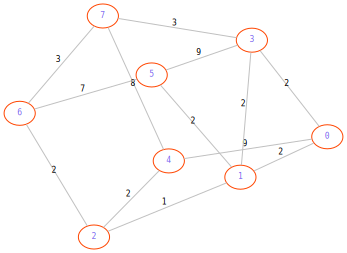

In [14]:
drawG_al(G, weighted=True)

[3, 3, 1, -1, 2, 1, 2, 3]
[2, 2, 3, 0, 5, 4, 5, 3]


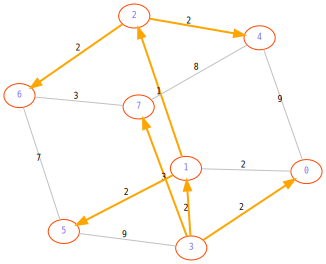

In [15]:
path, cost = dijkstra(G, 3)
print(path)
print(cost)
drawG_al(G, weighted=True, path=path)